# Introduction

Using LSTM model to predict stonks(stocks) closing price.

Notebook adapted from: https://www.kaggle.com/faressayah/stock-market-analysis-prediction-using-lstm

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
# For time stamps
from datetime import datetime

## 0. Get stonk data from yahoo

In [2]:
symbol = 'MSFT'

# Get the stock quote
df = DataReader(symbol, data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.799267
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.312283
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.540291
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.890448
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.589146
...,...,...,...,...,...,...
2021-04-26,262.440002,260.170013,261.660004,261.549988,19763300.0,261.549988
2021-04-27,263.190002,260.119995,261.579987,261.970001,31014200.0,261.970001
2021-04-28,256.540009,252.949997,256.079987,254.559998,46903100.0,254.559998


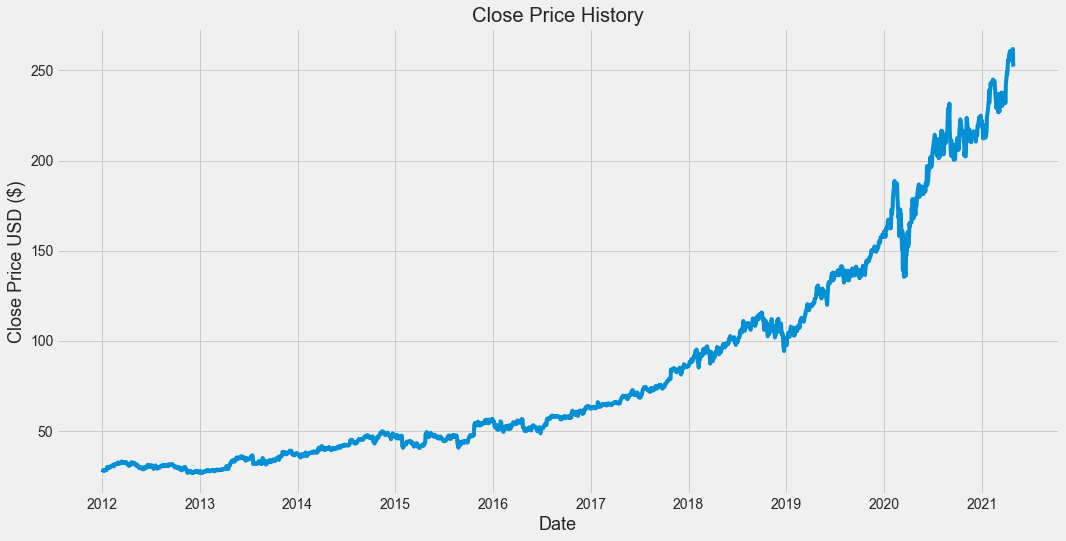

In [3]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

## 1. Create training set data

In [4]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .90 ))

training_data_len

2113

In [5]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00169779],
       [0.00437181],
       [0.00556027],
       ...,
       [0.96854837],
       [0.95984717],
       [0.95844648]])

In [6]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00169779, 0.00437181, 0.00556027, 0.0073854 , 0.00581494,
       0.00623939, 0.00573004, 0.0069185 , 0.00797962, 0.00802207,
       0.00789473, 0.00742784, 0.01417656, 0.01426145, 0.01260611,
       0.01353989, 0.01328523, 0.01213921, 0.01375212, 0.01341256,
       0.01494057, 0.01519525, 0.01642614, 0.01625637, 0.01689304,
       0.01820882, 0.01867572, 0.01752971, 0.01786927, 0.01646859,
       0.01561969, 0.02088285, 0.02071307, 0.02151952, 0.02079796,
       0.02122241, 0.0216893 , 0.02113752, 0.02334465, 0.02279286,
       0.02512733, 0.024236  , 0.02304753, 0.02202886, 0.02321731,
       0.02393887, 0.02385399, 0.02406621, 0.02674023, 0.02716468,
       0.02750423, 0.02644311, 0.02474533, 0.02385399, 0.02351443,
       0.02389643, 0.02393887, 0.02640068, 0.02610356, 0.02470288])]
[0.02440576436053185]

[array([0.00169779, 0.00437181, 0.00556027, 0.0073854 , 0.00581494,
       0.00623939, 0.00573004, 0.0069185 , 0.00797962, 0.00802207,
       0.00789473, 0.00742784, 0.01

(2053, 60, 1)

## 2. Define the LSTM model + training

In [7]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2053/2053 [==============================] - 30s 14ms/step - loss: 0.0011


In [8]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.580947704301091

## 3. Prediction

<ipython-input-9-c4aee32f125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


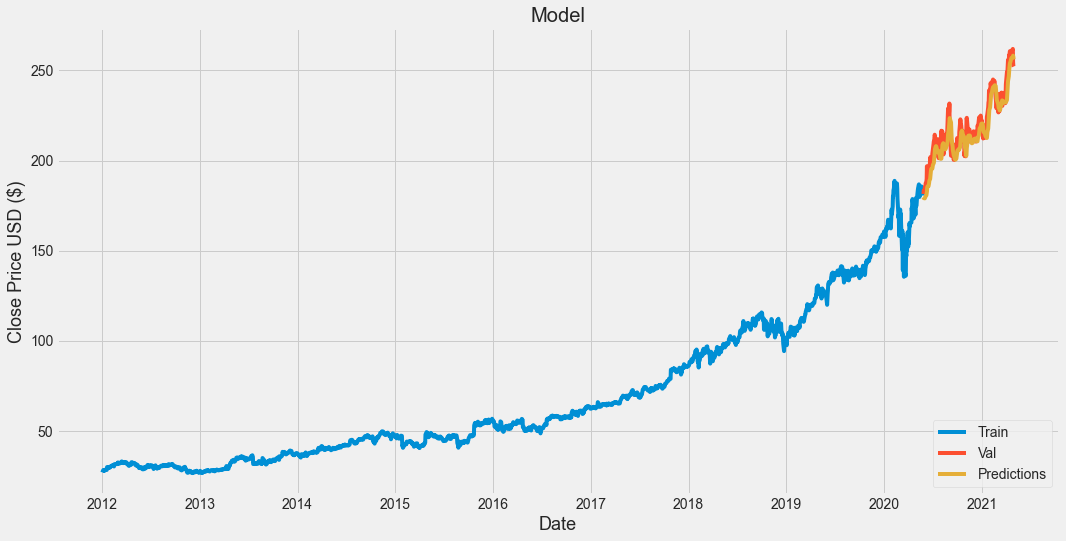

In [9]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [10]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-05-28,181.399994,179.560974
2020-05-29,183.250000,179.122406
2020-06-01,182.830002,179.005859
2020-06-02,184.910004,178.985016
2020-06-03,185.360001,179.337524
...,...,...
2021-04-26,261.549988,257.181458
2021-04-27,261.970001,257.677704
2021-04-28,254.559998,258.247345
